In [3]:
## import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
df = pd.DataFrame({"a": [1,2,3],
                   "b": [4,5,6],
                   "c": [7,8,9]},
                  index = [1,2,3])
df

,a,b,c
1,1,4,7
2,2,5,8
3,3,6,9


In [5]:
df1 = pd.DataFrame([[1,4,7],
                   [2,5,8],
                   [3,6,9]],
                  index = [1,2,3],
                  columns = ['a', 'b', 'c'])
df1

,a,b,c
1,1,4,7
2,2,5,8
3,3,6,9


In [6]:
dfMultiIndex = pd.DataFrame({"a": [1,2,3],
                   "b": [4,5,6],
                   "c": [7,8,9]},
                  index =pd.MultiIndex.from_tuples(
                      [('d', 1), ('d', 2), ('e', 2)],
                      names=['x1', 'x2']))
dfMultiIndex

a  b  c
x1 x2         
d  1   1  4  7
   2   2  5  8
e  2   3  6  9

In [7]:
## indexing with loc, iloc functions
## loc uses labels, while iloc uses indices 
df.loc[1, 'c']

7

In [8]:
df.iloc[0,2]

7

In [9]:
df.loc[2,['b','c']]

b    5
c    8
Name: 2, dtype: int64

In [10]:
df.iloc[1,1:3]

b    5
c    8
Name: 2, dtype: int64

In [11]:
## concat
pd.concat([df, df,df], axis = 1)

,a,b,c,a,b,c,a,b,c
1,1,4,7,1,4,7,1,4,7
2,2,5,8,2,5,8,2,5,8
3,3,6,9,3,6,9,3,6,9


In [12]:
df.sort_values(1, axis = 1, ascending=False)

,c,b,a
1,7,4,1
2,8,5,2
3,9,6,3


In [13]:
## delete --- you can use drop to delete
df.drop(columns='c', inplace = True)

In [22]:
df

,a
1,1
2,2
3,3


In [35]:
df.drop([1,3])

,a,b
2,2,5


In [15]:
df.T

,1,2,3
a,1,2,3
b,4,5,6


In [14]:
df['a'].value_counts()

1    1
2    1
3    1
Name: a, dtype: int64

In [16]:
df.describe()

,a,b
count,3.0,3.0
mean,2.0,5.0
std,1.0,1.0
min,1.0,4.0
25%,1.5,4.5
50%,2.0,5.0
75%,2.5,5.5
max,3.0,6.0


In [17]:
tipsData = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")
tipsData.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [44]:
## info about my dataset
tipsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [40]:
tipsData.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [41]:
## missing values
tipsData.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [49]:
## tips received by waiter on different days
tipsData.groupby(['day']).count()

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76
Thur,62,62,62,62,62,62


In [46]:
## tips received by waiter on different days
tipsData.groupby(['day']).sum()

C:\Users\44790\AppData\Local\Temp\ipykernel_44852\2862346596.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tipsData.groupby(['day']).sum()


,total_bill,tip,size
day,,,
Fri,325.88,51.96,40
Sat,1778.40,260.40,219
Sun,1627.16,247.39,216
Thur,1096.33,171.83,152


In [43]:
tipsDayPercentage = 100 * tipsData.groupby(['day']).sum()['tip']/tipsData.groupby(['day']).sum()['total_bill']
tipsDayPercentage

C:\Users\44790\AppData\Local\Temp\ipykernel_44852\1604680137.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tipsDayPercentage = 100 * tipsData.groupby(['day']).sum()['tip']/tipsData.groupby(['day']).sum()['total_bill']
C:\Users\44790\AppData\Local\Temp\ipykernel_44852\1604680137.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tipsDayPercentage = 100 * tipsData.groupby(['day']).sum()['tip']/tipsData.groupby(['day']).sum()['total_bill']


day
Fri     15.944519
Sat     14.642375
Sun     15.203791
Thur    15.673201
dtype: float64

In [60]:
## convert ther series into a dataframe
tipsDayPercentage = tipsDayPercentage.to_frame('tip(%)').reset_index()
tipsDayPercentage

,day,tip(%)
0,Fri,15.944519
1,Sat,14.642375
2,Sun,15.203791
3,Thur,15.673201


<AxesSubplot: ylabel='day'>

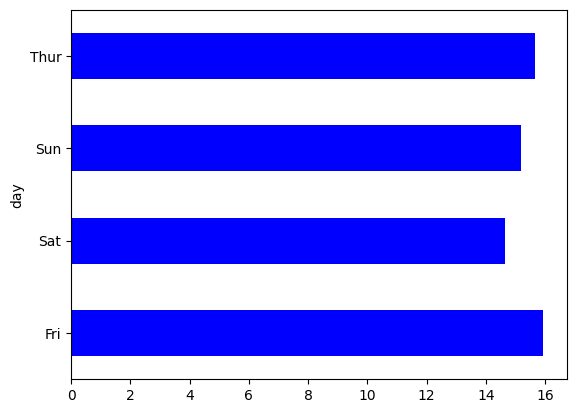

In [47]:
## bar plot 
fig, ax = plt.subplots()
tipsDayPercentage.plot(kind = 'barh', x = 'day', y = 'tip(%)', color = 'blue', ax=ax)

<AxesSubplot: ylabel='day'>

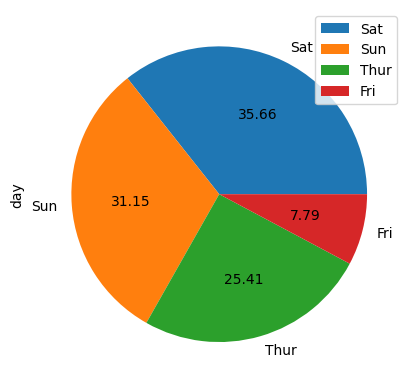

In [48]:
days = pd.DataFrame(tipsData['day'].value_counts())
days.reset_index(inplace= True)
fig, ax = plt.subplots()
days.plot(kind = 'pie', y = 'day', labels = days['index'], autopct= '%1.2f', ax=ax)

array([<AxesSubplot: title={'center': 'total_bill'}>], dtype=object)

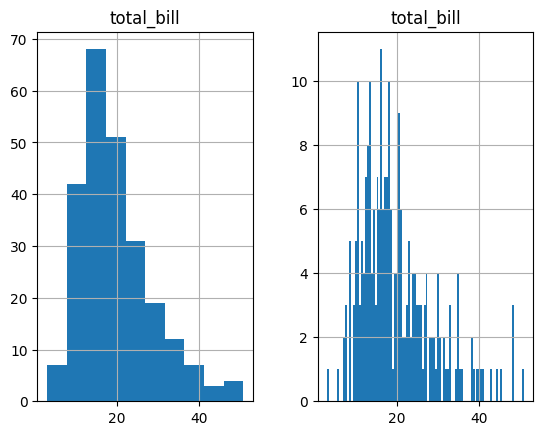

In [49]:
fig, ax = plt.subplots(1,2)
tipsData.hist(column='total_bill', ax = ax[0])
tipsData.hist(column='total_bill', bins = 100, ax = ax[1])

